# **Module 4: Analytics Engineering**

https://github.com/DataTalksClub/data-engineering-zoomcamp/tree/main/04-analytics-engineering

**Goal**: **Transforming** the **data loaded in DWH** into **Analytical Views** developing a **dbt** project.

**Prerequisites**

By this stage of the course you should have already:

- A running **warehouse** (BigQuery or postgres)
- A set of **running pipelines ingesting the project dataset** (week 3 completed)
- The following datasets ingested from the course Datasets list:
    - Yellow taxi data - Years 2019 and 2020
    - Green taxi data - Years 2019 and 2020
    - fhv data - Year 2019.

https://github.com/DataTalksClub/nyc-tlc-data/

We have two quick hack to load that data quicker, follow this video for option 1 (https://www.youtube.com/watch?v=Mork172sK_c&list=PLaNLNpjZpzwgneiI-Gl8df8GCsPYp_6Bs) or check instructions in week3/extras for option 2 (https://github.com/DataTalksClub/data-engineering-zoomcamp/tree/main/03-data-warehouse/extras)

https://github.com/DataTalksClub/data-engineering-zoomcamp/blob/main/04-analytics-engineering/dbt_cloud_setup.md

## **4.1: Introduction to analytics engineering**
https://www.youtube.com/watch?v=uF76d5EmdtU&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=41
- What is analytics engineering?
- ETL vs ELT
- Data modeling concepts (fact and dim tables)

### **What is Analytics Engineering?**

To understand what we mean with **Analytics Engineering**, we need to look back a few yars and look at the latest **developments** in the **data domain** that changed the way data teams work and how stakeholders consume the data.

- **Cloud Data warehouses** such as BQ, Snowflake and Redshift **lowered** the **costs** for **storage** and **computing**
- Tools like Fivetran and Stitch **simplified the ETL process** for data load
- Tools like Looker **introduced in SQL version-control** for the **data workflow**
- Other tools like Mode enabled **self-service analytics**
- There is also a better consideration of **data governance**


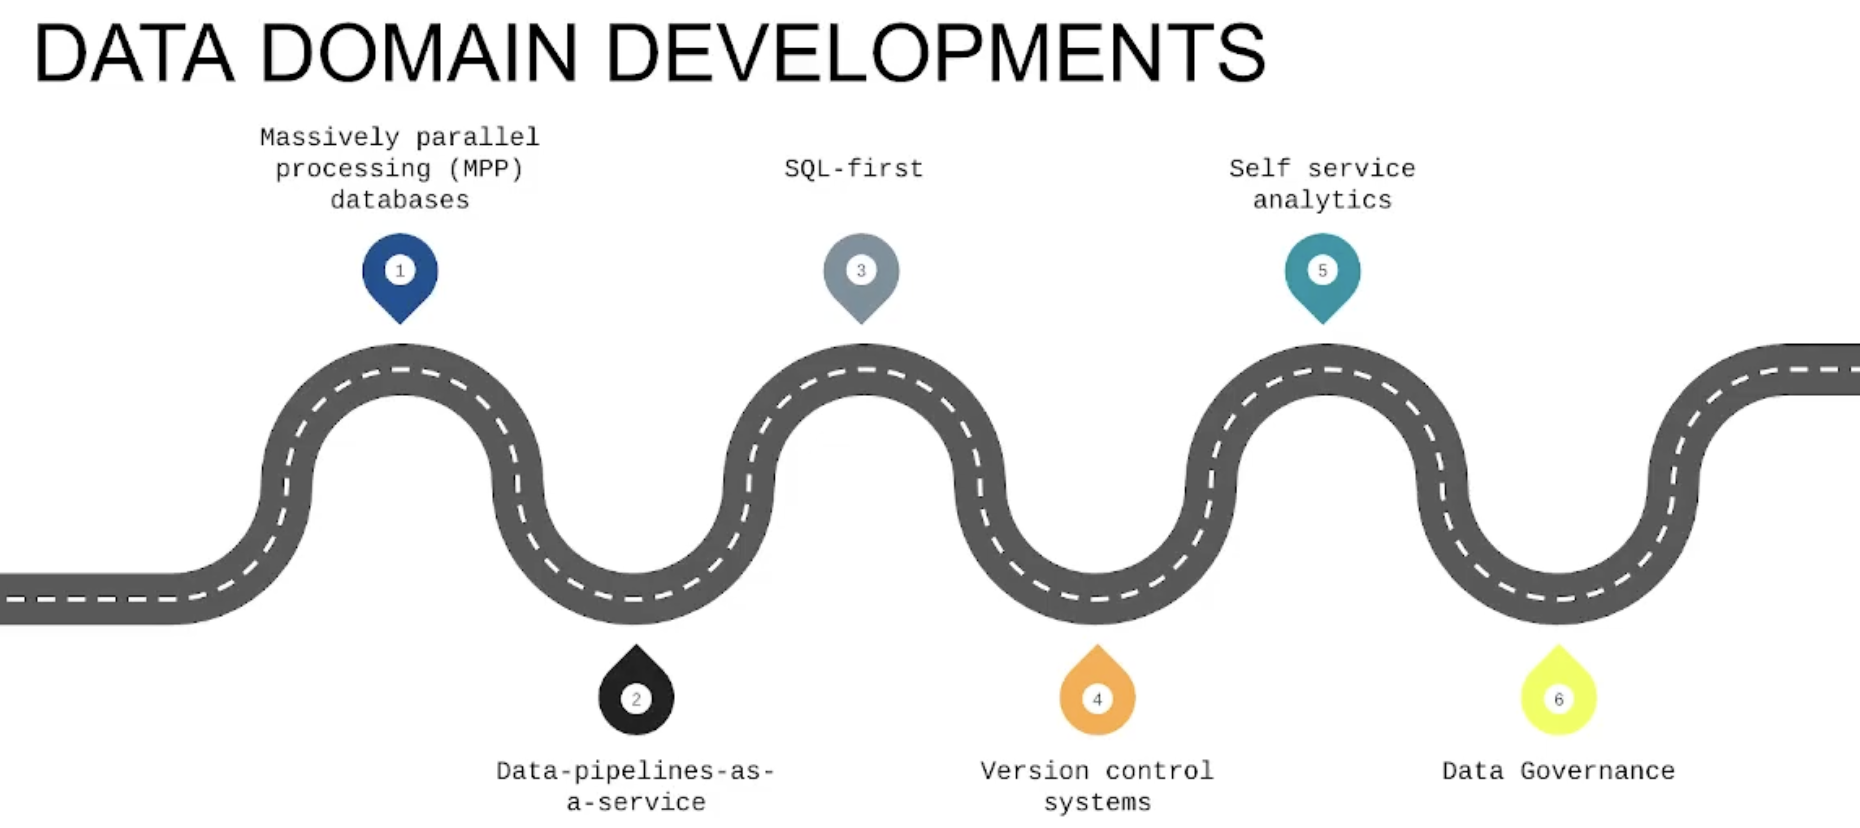

These changes have left a **gap** in the **roles within the data team**:

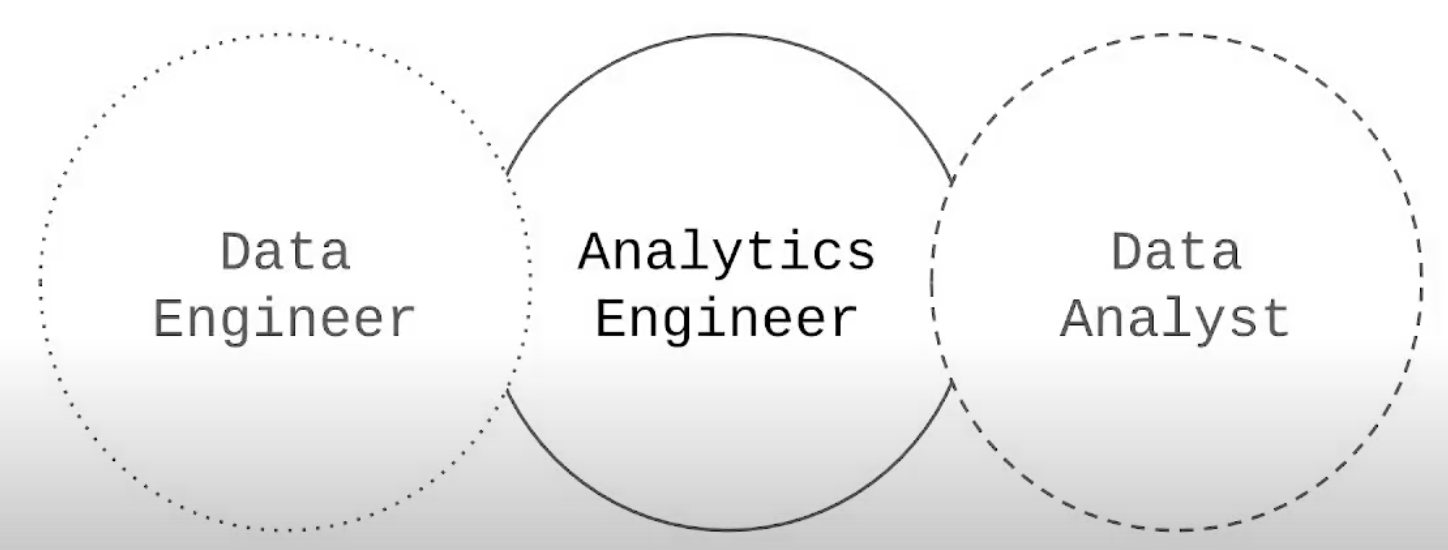



If we consider a traditional data team, we can recognise: 
- the **data engineer**: who is going to **prepare and maintain the infrastructure** that the data team will need
- the **data analyst** (and data scientist): who is going to be **using the data hosted in the infrastructure** to answer questions and solve problems

However, due to the latest developments in data mentioned above, we can notice that data analysts/scientists are writing more and more code, although they are not meant to be software engineers. On the other hand, many data engineers have been trained as software engineers but don't have the expertise in how the data is going to be used by the business users. This is the **gap** that the **analytics engineer** is trying to fill.

- **Anaytics engineers**: they introduce the **good software engineering practices** to the efforts of **data analysts** and **scientists**

These are some of the **tools** that the **Analytics Engineer** might be exposed to:

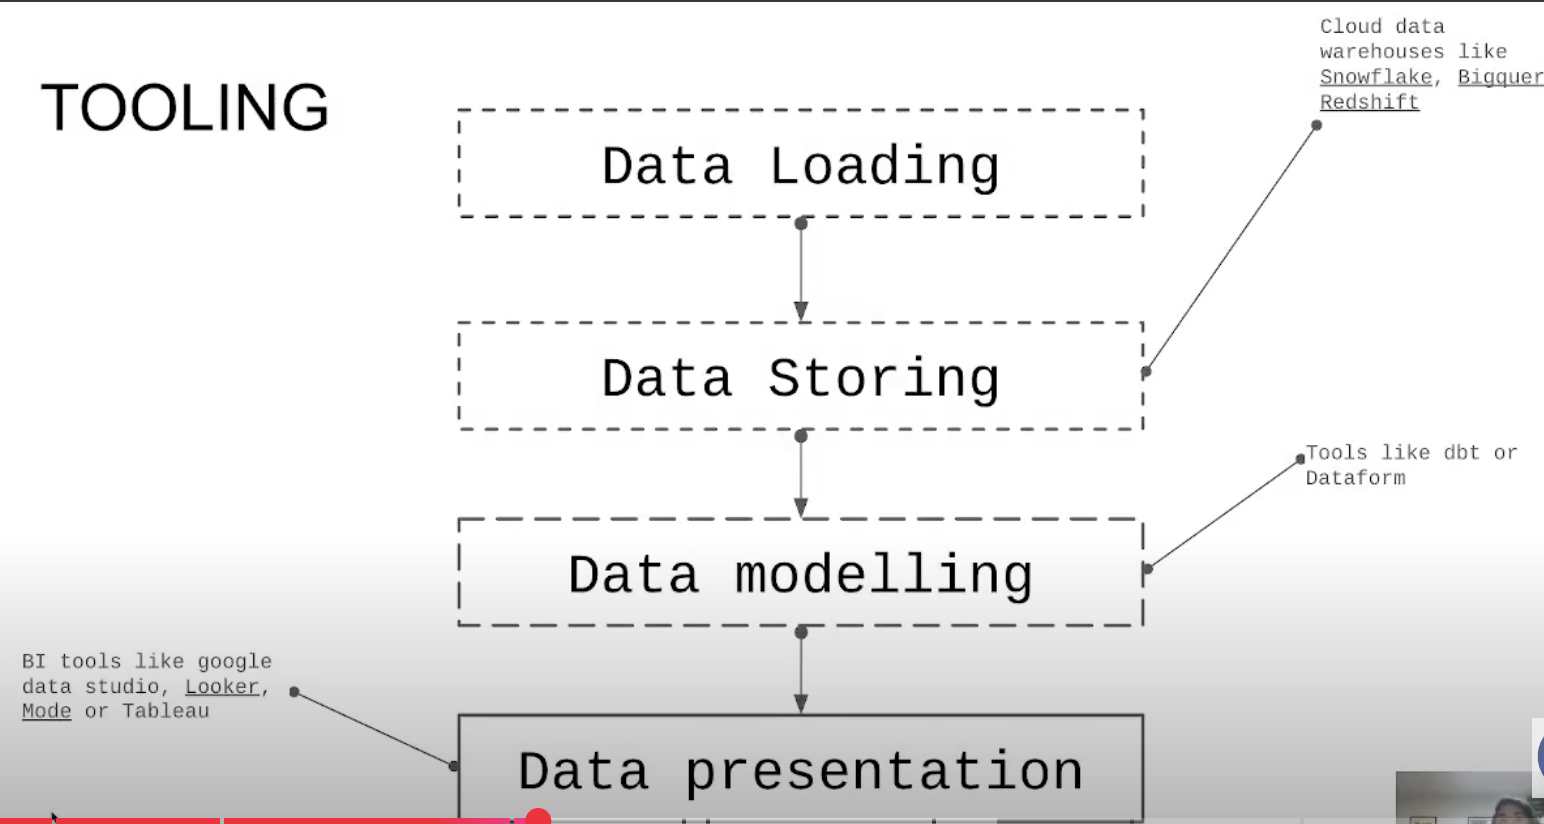

### **Data Modelling Concepts**
https://www.youtube.com/watch?v=uF76d5EmdtU&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=33


#### **Differences ETL vs ELT**

- **ETL** = **Extract, Transform, Load**. First we extract the sources, then we transform them and finally we load them to a DW. 
    - This first approach **takes longer to implement** because the **data needs to be transformed first**. 
    - The **data we host on the DW** is going to be **more stable** and **compliant** because it is already clean.
- **ELT** = **Extract, Load, Transform**. The data is transformed after extraction and loading into the DW.
    - This approach is **faster** and **more flexible** because the data is immediately loaded after extraction
    - It also takes **advantage of the data warehousing** that **lowered** the **cost of storage and compute** as we can now afford to load all the data in the DW and then transform it


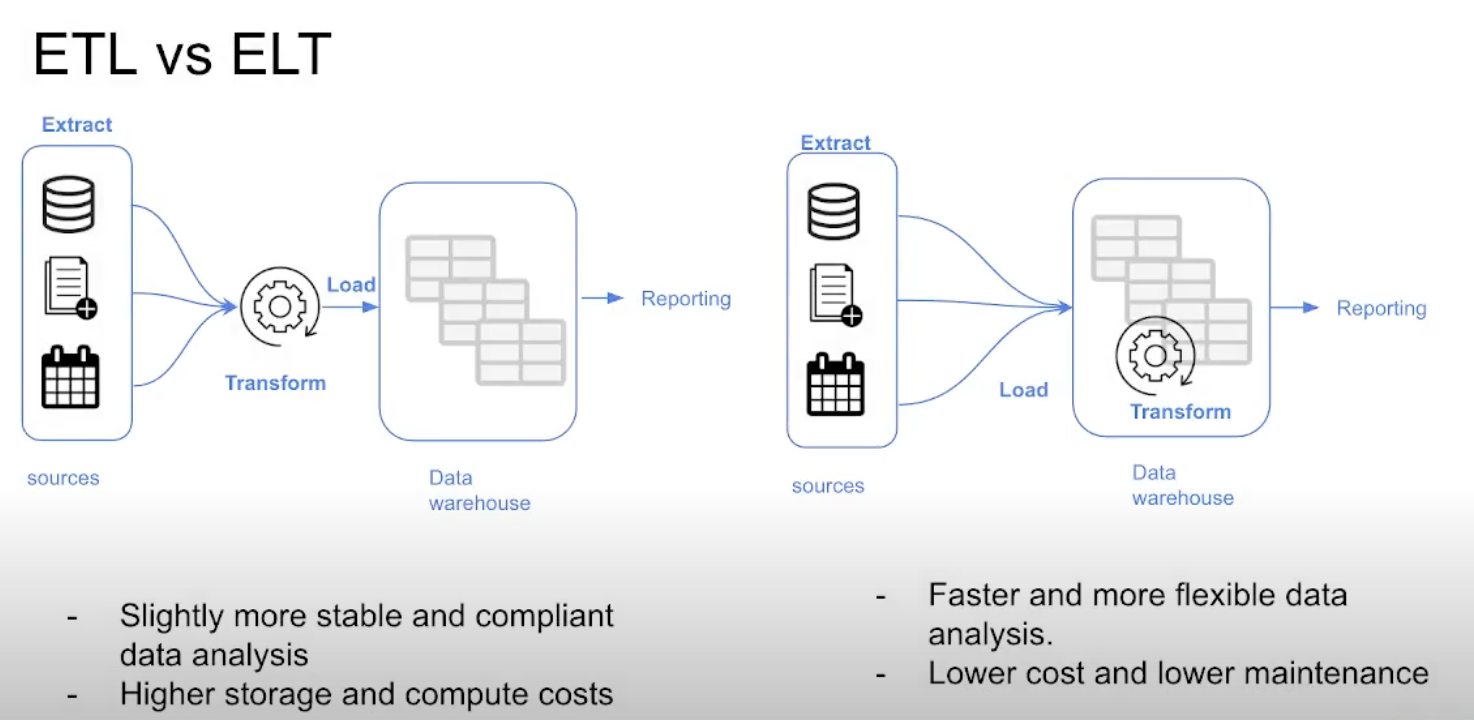

We will now get a deeper view of the **Transformation step**

#### **Kimball's Dimensional Modelling**

- **Objectives**:
    - Deliver **data understandable** to the **business users**
    - Deliver **fast query performance**
- **Approach**: **prioritise user understandability** and **query performance over non-redundant data** (i.e. normalised 3NF)

- **Other approaches**:
    - **Binn Inmon**
    - **Data Vault**


#### **Elements of Dimensional Modelling**

- **Facts tables**
    - **Measurements**, **metrics** or **facts**
    - Correspond to **business processes** ("**verbs**", e.g. sales or orders)

- **Dimensions' tables**:
    - **Context** to business processes
    - Correspond to **business entities** ("**nouns**", e.g. customers or products)

This is also known as **star schema**

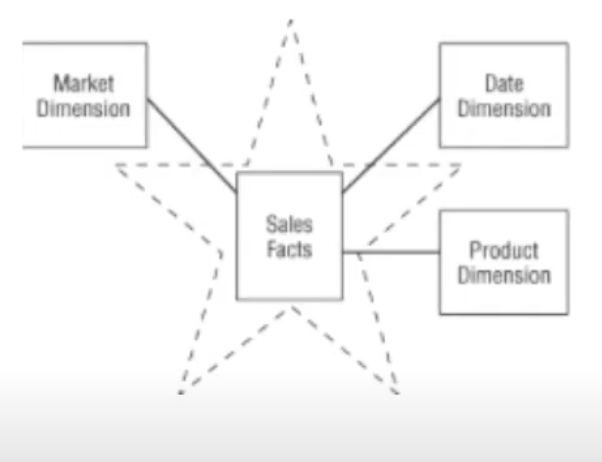

#### **Architecture of dimensional modelling** 
This be better understood using the **restaurant analogy**:

- **Stage Area** (like the food market):
    - Contains **raw data**
    - **Not** meant to be exposed to everyone

- **Processing Area** (like the kitchen):
    - From raw data to **data models**
    - Focusses on **efficiency**
    - Ensuring **standards**

- **Presentation Area** (like the dining hall of a restaurant):
    - **Final presentation** of the data
    - Exposure to **business stakeholder**

## **4.2: What is `dbt`?**
https://www.youtube.com/watch?v=gsKuETFJr54&list=PL3MmuxUbc_hJed7dXYoJw8DoCuVHhGEQb&index=34

https://www.getdbt.com/product/what-is-dbt

`dbt` is an **open-source command line** **transformation worflow** for **data warehouses** that allows anyone that know **SQL** to **deploy analytics code** following **software engineering best practices** like **modularity**, **portability**, **CI/CD** and **documentation**

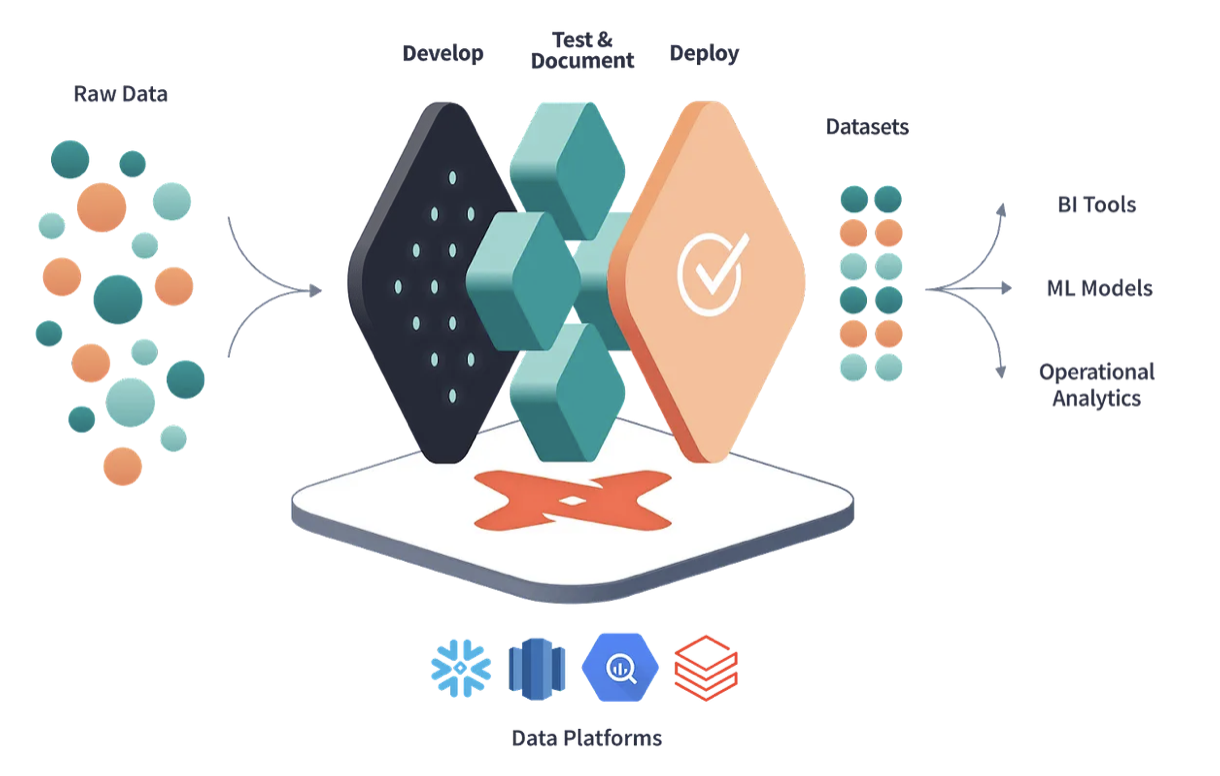

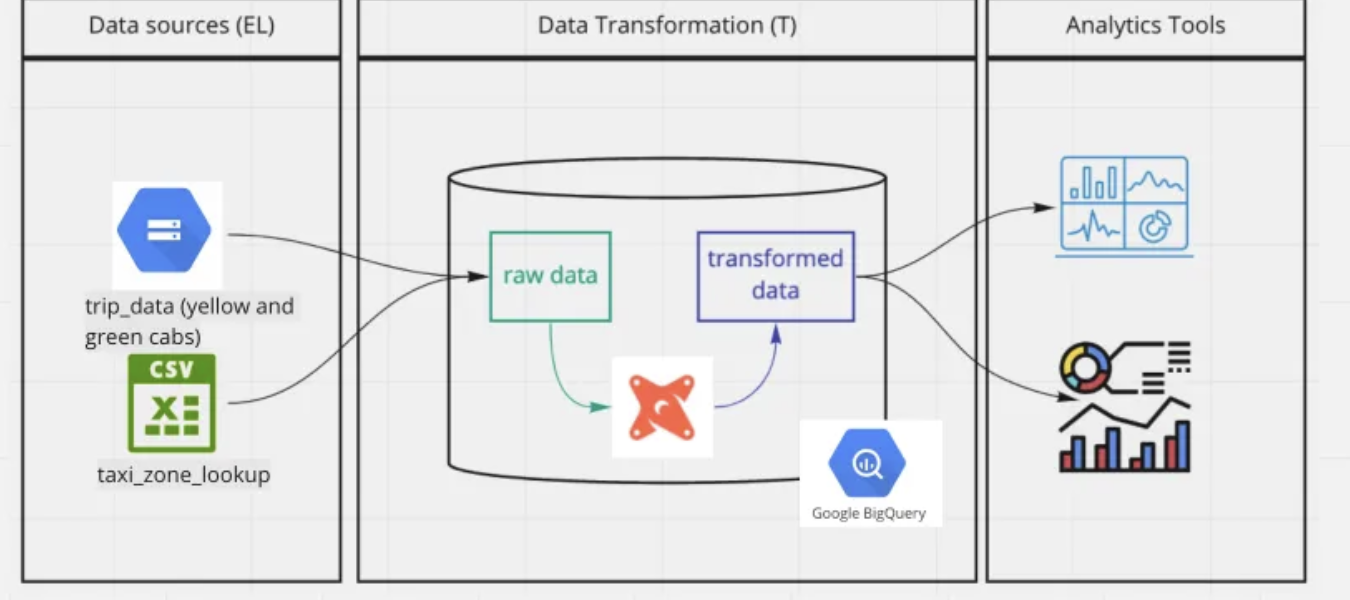

- **dbt** is going to **sit on top of the DW** (where al the raw data has been loaded) and it is going to help us to **transform** the **raw data** into something that is useful to **expose** and **present** to the **business stakeholders** and **data consumers** (e.g. via a BI tool or using some applications such as for ML workflows).

- dbt can be used with **SQL** or **python** and also introduces **best software engineering practices** into the workflow of our analytics code.

- **Layers** of **software engineering practices**:
    - **development**: this is carried out in a sort of sandbox where each developer has their own environment
    - **testing** and **documentation**
    - **deployment**